In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

Using TensorFlow backend.


In [5]:
max_features = 10000
maxlen = 20
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

### Train a model with an LSTM layer

In [4]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s - loss: 0.5819 - acc: 0.6953 - val_loss: 0.5217 - val_acc: 0.7366
Epoch 2/10
20000/20000 [==============================] - 7s - loss: 0.4401 - acc: 0.7957 - val_loss: 0.4984 - val_acc: 0.7478
Epoch 3/10
20000/20000 [==============================] - 7s - loss: 0.3956 - acc: 0.8212 - val_loss: 0.4973 - val_acc: 0.7564
Epoch 4/10
20000/20000 [==============================] - 8s - loss: 0.3690 - acc: 0.8365 - val_loss: 0.5303 - val_acc: 0.7508
Epoch 5/10
20000/20000 [==============================] - 8s - loss: 0.3507 - acc: 0.8459 - val_loss: 0.5248 - val_acc: 0.7494
Epoch 6/10
20000/20000 [==============================] - 9s - loss: 0.3359 - acc: 0.8529 - val_loss: 0.5449 - val_acc: 0.7364
Epoch 7/10
20000/20000 [==============================] - 8s - loss: 0.3228 - acc: 0.8621 - val_loss: 0.5636 - val_acc: 0.7402
Epoch 8/10
20000/20000 [==============================] - 8s -

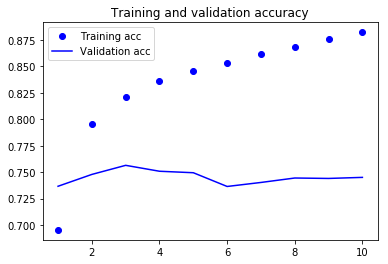

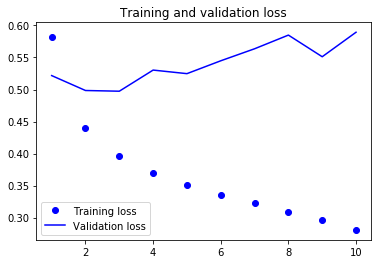

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()